In [2]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import json

In [3]:
def read_json(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return data
bd_train_640 = read_json('/home/ww/projects/wwfacedet/work_dirs/browse_dataset/bd_train_640.json')
bd_train_ori = read_json('/home/ww/projects/wwfacedet/work_dirs/browse_dataset/bd_train_ori.json')
bd_crop_03_10 = read_json('/home/ww/projects/wwfacedet/work_dirs/browse_dataset/bd_03_10.json')
bd_crop_05_15 = read_json('/home/ww/projects/wwfacedet/work_dirs/browse_dataset/bd_05_15.json')
bd_crop_03_20 = read_json('/home/ww/projects/wwfacedet/work_dirs/browse_dataset/bd_03_20.json')
# bd_crop_03_20_epoch_10 = read_json('/home/ww/projects/wwfacedet/work_dirs/browse_dataset/bd_03_20_epoch_10.json')
bd_ori_gt = read_json('/home/ww/projects/wwfacedet/work_dirs/browse_dataset/bd_labelv1_gt_ori.json')


def size_stat(data, level):
    count = [0] * (len(level) + 1)
    for k, v in data.items():
        for idx, le in enumerate(level):
            if int(k) < le:
                count[idx] += v
                break
        else:
            count[-1] += v
    total = np.sum(count)
    count_p = [c / total * 100 for c in count]
    return count, count_p


In [4]:
all_data = [bd_train_640, bd_train_ori, bd_crop_03_10, bd_crop_05_15, bd_crop_03_20, bd_ori_gt]
all_data_name = ['train_640', 'train_origin', 'crop', 'crop(ours)', 'crop_03_20', 'val_origin']
all_data_color = ['black', 'red', 'green', 'blue', 'yellow', 'cyan']
# level = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]

scale = 4
level = [scale * x for x in range(40)]
axis_x = np.arange(len(level) + 1) * scale

all_data_d = [size_stat(bd, level) for bd in all_data]


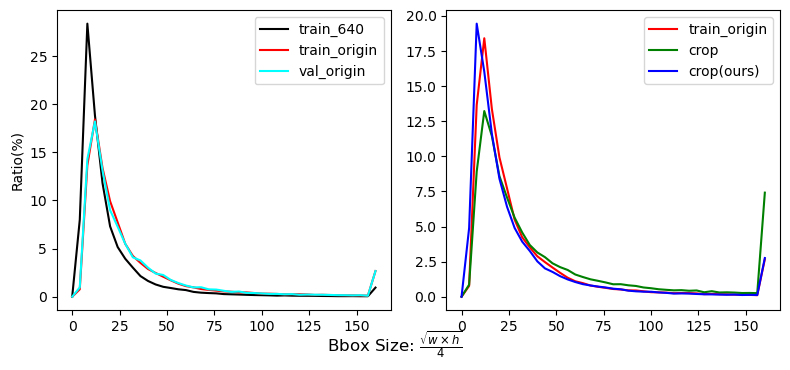

In [5]:
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
fig = plt.figure(figsize=(8, 4)) 
plt.suptitle('Bbox Size: $\\frac{\\sqrt{w \\times h}}{' + str(scale) +'}$', y = 0.05)
ax0 = plt.subplot(gs[0])
ax0.plot(axis_x, all_data_d[0][1], label=all_data_name[0], color=all_data_color[0])
ax0.plot(axis_x, all_data_d[1][1], label=all_data_name[1], color=all_data_color[1])
ax0.plot(axis_x, all_data_d[5][1], label=all_data_name[5], color=all_data_color[5])

ax0.set_ylabel('Ratio(%)')
ax0.legend()
ax1 = plt.subplot(gs[1])
ax1.plot(axis_x, all_data_d[1][1], label=all_data_name[1], color=all_data_color[1])
ax1.plot(axis_x, all_data_d[2][1], label=all_data_name[2], color=all_data_color[2])
ax1.plot(axis_x, all_data_d[3][1], label=all_data_name[3], color=all_data_color[3])

ax1.legend()
fig.tight_layout()
plt.savefig('./bbox_distribution.pdf', dpi=300, bbox_inches='tight')


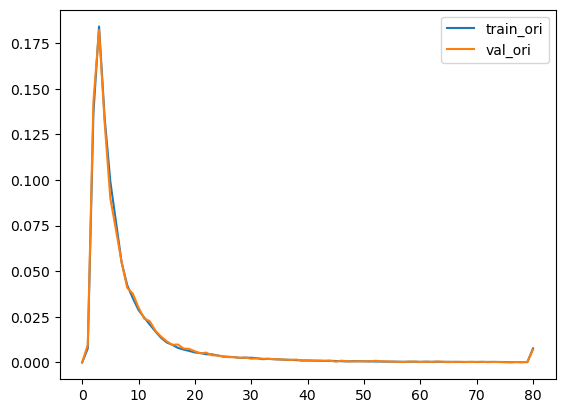

In [8]:
use = [1, 5]
for idx, bd_d in enumerate(all_data_d):
    if idx not in use:
        continue
    plt.plot(list(range(len(level) + 1)), bd_d[1], label=all_data_name[idx])
plt.legend()